선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

<img src ="https://www.dropbox.com/s/ehwsf6daook7wxf/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7%202020-12-29%20%EC%98%A4%ED%9B%84%209.46.28.png?raw=1">  

## 선형회귀 함수 사용법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

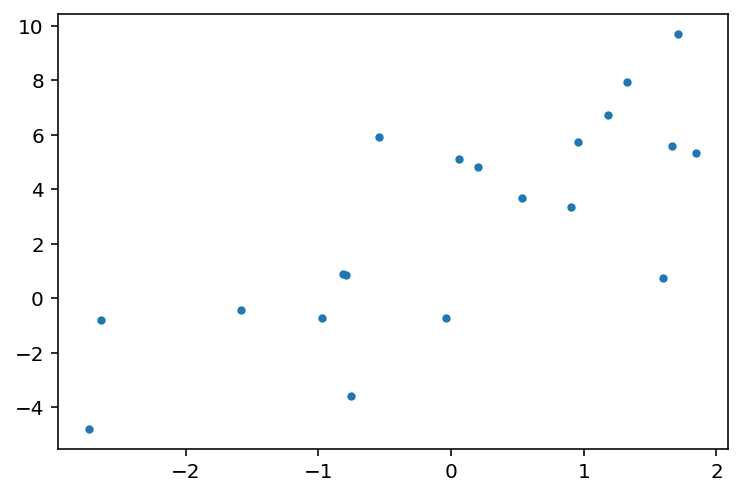

In [3]:
n_samples = 20
x = np.random.randn(n_samples)
w = 2
b = 3
# 노이지 추가
y = w*x + b  + 2.0* np.random.randn(n_samples)
plt.scatter(x,y, s=10)

In [4]:
np.corrcoef(x,y)

array([[1.        , 0.76134573],
       [0.76134573, 1.        ]])

In [5]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression() # (1) 모델 생성
leg.fit(x.reshape(-1,1), y) # (2) 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
leg.coef_ , leg.intercept_

(array([2.13900624]), 2.6499689767269516)

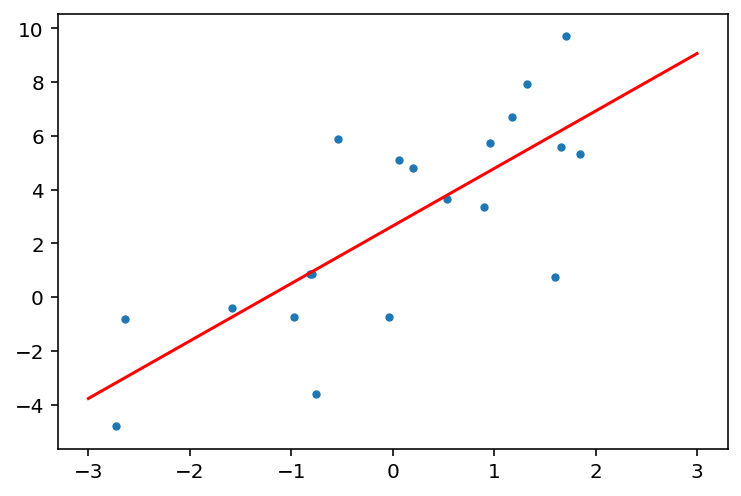

In [7]:
a, b = leg.coef_ , leg.intercept_
xs = np.linspace(-3,3,2)
ys = a*xs + b
plt.plot(xs,ys, c='r')
plt.scatter(x,y, s=10)

## 경사하강법 구현

변수가 1개인 경우
--

In [8]:
num_epoch = 10
lr = 1
w = np.random.uniform()
b = np.random.uniform()
print(w,b)

for epoch in range(num_epoch): 
    y_pred = w*x + b
    e = y_pred - y
    print(f"{epoch:2} w = {w:.3f}, b = {b:.3f}, error = {np.abs(e).mean():.3f}")
    w = w - lr*(e*x).mean()
    b = b - lr*e.mean()

0.34523448179459226 0.8768761348865413
 0 w = 0.345, b = 0.877, error = 3.271
 1 w = 3.757, b = 2.749, error = 2.563
 2 w = 0.762, b = 2.561, error = 2.661
 3 w = 3.311, b = 2.726, error = 2.269
 4 w = 1.142, b = 2.585, error = 2.332
 5 w = 2.988, b = 2.705, error = 2.123
 6 w = 1.417, b = 2.603, error = 2.135
 7 w = 2.754, b = 2.690, error = 2.027
 8 w = 1.616, b = 2.616, error = 2.046
 9 w = 2.584, b = 2.679, error = 1.999


변수가 2개인 경우
--

In [9]:
n_samples = 20
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4  + 0.1*np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[2.0223424  3.00572648]
3.9737263776139686


경사하강법
--

In [10]:
num_epoch = 10
lr = 0.1

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.898071,  w2 = 0.161242, b = 0.086532 , error = 4.377816
 1 w1 = 1.104735,  w2 = 0.620330, b = 0.484351 , error = 3.849689
 2 w1 = 1.276119,  w2 = 1.004989, b = 0.840918 , error = 3.388895
 3 w1 = 1.418079,  w2 = 1.327286, b = 1.160597 , error = 2.988053
 4 w1 = 1.535509,  w2 = 1.597334, b = 1.447277 , error = 2.653234
 5 w1 = 1.632502,  w2 = 1.823608, b = 1.704423 , error = 2.357604
 6 w1 = 1.712476,  w2 = 2.013209, b = 1.935131 , error = 2.096322
 7 w1 = 1.778290,  w2 = 2.172087, b = 2.142161 , error = 1.865179
 8 w1 = 1.832330,  w2 = 2.305227, b = 2.327979 , error = 1.668107
 9 w1 = 1.876587,  w2 = 2.416807, b = 2.494790 , error = 1.497727
